In [99]:
using DelimitedFiles
using Random
using Turing
using LinearAlgebra
using LinearAlgebra
using Distributions

data = readdlm("../../data/data.txt")
t, y, yerr = data[:, 1], data[:, 2], data[:, 3]

include("EnSS_code.jl")

move (generic function with 1 method)

In [106]:

n_schools = 8
y = [28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0] # estimated treatment effects
σ = [15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0] # standard error of the effect estimate
@model function schools(y, σ)
    μ ~ Normal(0, 5)
    τ ~ truncated(Cauchy(0, 5), lower = 0)
    θ ~ filldist(Normal(μ, τ), n_schools)
    for i in 1:n_schools
        y[i] ~ Normal(θ[i], σ[i])
    end
end

@model function school_reparam(y, σ)
    μ ~ Normal(0, 5)
    τ ~ truncated(Cauchy(0, 5), lower = 0)
    θ ~ filldist(Normal(0, 1), n_schools)
    # y .~ ForEach(μ .+ τ .* θ, σ)
    for i in 1:n_schools
        y[i] ~ Normal(μ + τ * θ[i], σ[i])
    end
end

mymod = school_reparam(y, σ)

Model{typeof(school_reparam), (:y, :σ), (), (), Tuple{Vector{Float64}, Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(school_reparam, (y = [28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0], σ = [15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0]), NamedTuple(), DynamicPPL.DefaultContext())

In [107]:
# fun(x,α,β,γ) = @. α * x^2 + β * x + γ
# x = 0.0:0.5:15.0

# @model function InferenceModel(y, t)
# 	α ~ Normal(2, 1)
# 	β ~ Normal(0, 1)
# 	γ ~ Normal(-2, 1)
# 	return y ~ MvNormal(fun(t, α, β, γ), I)
# end

# mymod = InferenceModel(y, t)
spl = EnSS(50)

EnSS{(), EnsembleSliceSampler{Float64, Int64}}(EnsembleSliceSampler{Float64, Int64}(1.0, 50, 50, 10000))

In [110]:
rng = Random.MersenneTwister(0)
chain = sample(rng,mymod, spl, 20_000,progress=true);

Sampling   0%|                                          |  ETA: N/A
Sampling   0%|▎                                         |  ETA: 0:03:35
Sampling   1%|▍                                         |  ETA: 0:03:14
Sampling   2%|▋                                         |  ETA: 0:03:06
Sampling   2%|▉                                         |  ETA: 0:03:02
Sampling   2%|█                                         |  ETA: 0:03:02
Sampling   3%|█▎                                        |  ETA: 0:02:58
Sampling   4%|█▌                                        |  ETA: 0:02:55
Sampling   4%|█▋                                        |  ETA: 0:02:54
Sampling   4%|█▉                                        |  ETA: 0:02:51
Sampling   5%|██▏                                       |  ETA: 0:02:50
Sampling   6%|██▎                                       |  ETA: 0:02:49
Sampling   6%|██▌                                       |  ETA: 0:02:47
Sampling   6%|██▊                                       |  ETA: 0:02

InterruptException: InterruptException:

In [7]:
using Random

In [40]:
n = 10
rng = MersenneTwister()
randperm(rng,n)

10-element Vector{Int64}:
  7
  4
  3
  9
  5
  2
  1
 10
  8
  6

In [52]:
walker_indexes = randperm(rng, n)
subset_a = walker_indexes[1:div(n, 2)]
subset_b = walker_indexes[div(n, 2)+1:end]
sets = [[subset_a ,subset_b] ,[subset_b, subset_a]]
n_s = div(n, 2)

5

In [53]:
ndim=3

3

In [54]:
using Combinatorics

In [62]:

permuts = collect(permutations(subset_a,2))
rand(rng,permuts,n_s)

5-element Vector{Vector{Int64}}:
 [6, 2]
 [8, 9]
 [8, 6]
 [8, 6]
 [2, 6]

In [95]:
s = fill(true,div(n, 2))
s[2] = false
s[3] = false
s[1] = false
s[4] = false
s[5] = false
size(s[s],1)>0

false

In [71]:
nwalkers = 2
maxsteps = 100
J = floor.(Int, maxsteps .* rand(rng, div(nwalkers, 2)))
K = (maxsteps .- 1) .- J

11-element Vector{Int64}:
 991
 975
 133
 407
 455
 292
 316
 933
  46
 194
 228

In [98]:
s = fill(true, 20)
s[2] = false

s[12] = false
(1:20)[s]

18-element Vector{Int64}:
  1
  3
  4
  5
  6
  7
  8
  9
 10
 11
 13
 14
 15
 16
 17
 18
 19
 20

In [38]:
sets[1][1]

3-element Vector{Int64}:
 3
 1
 5

In [4]:
chain[100:end,:,:]

Chains MCMC chain (901×7×10 Array{Float64, 3}):

Iterations        = 100:1:1000
Number of chains  = 10
Samples per chain = 901
parameters        = α, β, γ
internals         = lp, accepted, length_scale, t

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

           α    3.0482    0.0096    0.0002   1726.8800   2250.2401    1.0049   ⋯
           β   -0.2463    0.1460    0.0036   1692.0604   2332.9058    1.0058   ⋯
           γ   -3.4537    0.4520    0.0113   1597.6036   2283.2834    1.0083   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           α    3.0293    3.0418    3.0481    3.0547    3.0667
           β   -0.5280   -0.3466   -0.2467   -0.1471    0.0436
           γ   -4.3599

In [5]:
# using PairPlots
# import CairoMakie
# pairplot(chain[100:end,:,:])

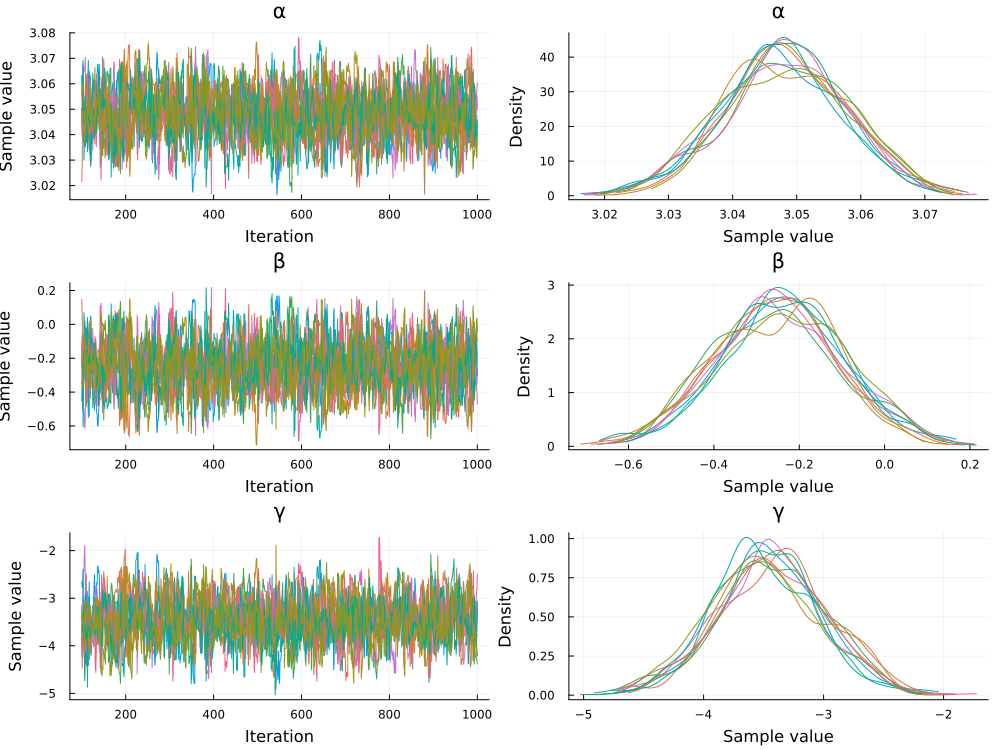

In [6]:
using StatsPlots
StatsPlots.plot(chain[100:end,:,:])